# VISA CASE STUDY

### Problem Statement:
><b>How would you determine if a specific block in your neighborhood is suitable for a new grocery store?

The following Notebook is an attempt to acheive the following:<br>
***
1. Frame the above problem coherently
2. Use Analyses techniques on the data
3. Leverage the results and findings to suggest possible solutions/insights
4. Discuss potential limitations of the approach

### Framing the Problem

We are trying to assess the pros and cons of choosing a specific neighbourhood block as the site for our grocery stores.<br>
Let us lay some base assumptions and groundwork for the analyses that will be carried out.<br>
***
1. The location is chosen as the corner of <b>Baker and Fulton Street</b>, located in the North of Panhandle region in San Francisco. (This location was chosen because I recently noticed a popular Chilis pie shop permanently close at that location)
2. Factors affecting our decision:
<b><br>
 a. Security<br>
 b. Population density around the block<br>
 c. Traffic <br>
 d. Distance from import location<br>
 e. Rent trend in the city of San Francisco<br>
 f. Existence of other grocery stores in the vicinity<br>
 f. _More factors can be added later_<br></b>
 
Our final decision will be based on the insights we gain from analyzing the above 

## Exploratory Analysis

### Security

Lets start with our first area of concern which is the security in the area.<br><br>
>Assuming most people aren't very likely to shop for groceries in parts of town more notorious for criminal offenses. A prime factor that affects our decision for the grocery shops is the security in the area. 

#### Acquiring the data

Fortunately, San Francisco has a public repository of city data related to Transportaion, City Infrastructure and yes <b> Public Safety</b> avaliable at:<br>
>https://datasf.org<br>
>https://data.sfgov.org/Public-Safety/Police-Department-Incidents-Current-Year-2018-/956q-2t7k

I've chosen police department incidents for the year of 2018 so far.

Handling Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
crime_df = pd.read_csv('Police_Department_Incidents_-_Current_Year__2018_.csv')

In [3]:
crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,189014013,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Monday,01/01/2018,22:37,TARAVAL,"ARREST, BOOKED",3500 Block of 19TH AV,-122.474829,37.723976,"(37.723975823482135, -122.47482947577244)",18901401371024
1,186095971,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Monday,01/01/2018,08:00,TENDERLOIN,NONE,500 Block of EDDY ST,-122.416711,37.783357,"(37.78335703909351, -122.41671073384802)",18609597119050
2,186084021,FRAUD,"CREDIT CARD, THEFT BY USE OF",Monday,01/01/2018,00:01,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,"(37.78189594886033, -122.42822330317604)",18608402109320
3,186072593,NON-CRIMINAL,LOST PROPERTY,Monday,01/01/2018,17:00,MISSION,NONE,2100 Block of MARKET ST,-122.429789,37.766652,"(37.766652147476215, -122.4297889869883)",18607259371000
4,186063279,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/01/2018,22:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",18606327906244


In [4]:
crime_df.shape

(46668, 13)

In [5]:
crime_df.describe()

,IncidntNum,X,Y,PdId
count,4.666800e+04,46668.000000,46668.000000,4.666800e+04
mean,1.813598e+08,-122.423404,37.769032,1.813598e+13
std,2.974998e+06,0.025635,0.023854,2.974998e+11
min,1.802993e+07,-122.513642,37.707922,1.802993e+12
25%,1.801110e+08,-122.433111,37.756486,1.801110e+13
50%,1.802233e+08,-122.417145,37.775421,1.802233e+13
75%,1.803351e+08,-122.406978,37.785151,1.803351e+13
max,3.860343e+08,-122.365241,37.819923,3.860343e+13


In [6]:
crime_df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

Lets look at the object types

In [7]:
crime_df.describe(include=[np.object])

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Location
count,46668,46668,46668,46668,46668,46668,46668,46668,46668
unique,37,590,7,135,1422,10,9,10215,11240
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2018,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,"(37.775420706711, -122.40340479147905)"
freq,13632,6256,7144,453,1171,8577,34509,1041,1035


>To better understand our data, lets first look at the <b>Category</b> and <b>PdDistrict</b> features, as they seem relevant to crime and location information.

In [8]:
category_counts = crime_df.Category.value_counts()
district_counts = crime_df.PdDistrict.value_counts()

#### Visualizing the crime category and the district counts

In [9]:
def make_bar_plot(x,y, palette,xlabel,ylabel):
    fig,axs = plt.subplots(figsize = (10,10))

    sns.barplot(x = x,
                y = y,
                palette = palette
               )

    axs.set(xlabel = xlabel, ylabel = ylabel)

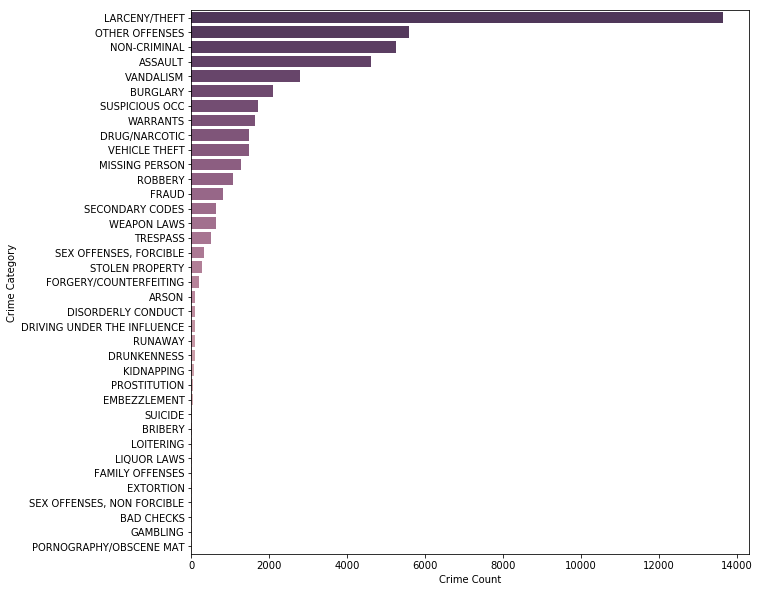

In [10]:
make_bar_plot(category_counts,
             category_counts.index,
             sns.cubehelix_palette(len(category_counts),dark=0.25, light=0.9,reverse=True),
             'Crime Count',
             'Crime Category')

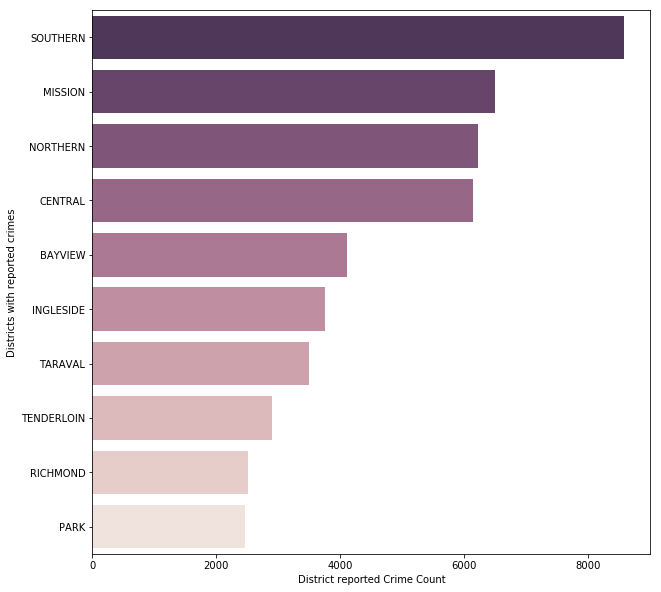

In [14]:
make_bar_plot(district_counts,district_counts.index,
             sns.cubehelix_palette(len(district_counts),dark=0.25, light=0.9,reverse=True),
             'District reported Crime Count',
             'Districts with reported crimes')

The following observations can be made from the above two visualizations:<br>
1. The most common crimes are Theft, Non criminal and Other offenses(which are slightly ambiguous), Assault, Vandalism and Burglary. <br> All of these (excluding the ambiguous ones) are a source of concern while opening a grocery shop in the area.<br><br>
2. Most number of crimes occured in the Southern district. Luckily our location is in the Park District, which has the lowest crime rates.

A better indication would be to look at the distress calls which were made from the Park district. We do this in the next few lines of code.

In [15]:
park_crimes_df = crime_df.loc[crime_df['PdDistrict']=='PARK',['PdDistrict','Category']]
park_crimes_df.head()

,PdDistrict,Category
6,PARK,LARCENY/THEFT
8,PARK,LARCENY/THEFT
22,PARK,LARCENY/THEFT
33,PARK,OTHER OFFENSES
77,PARK,VANDALISM


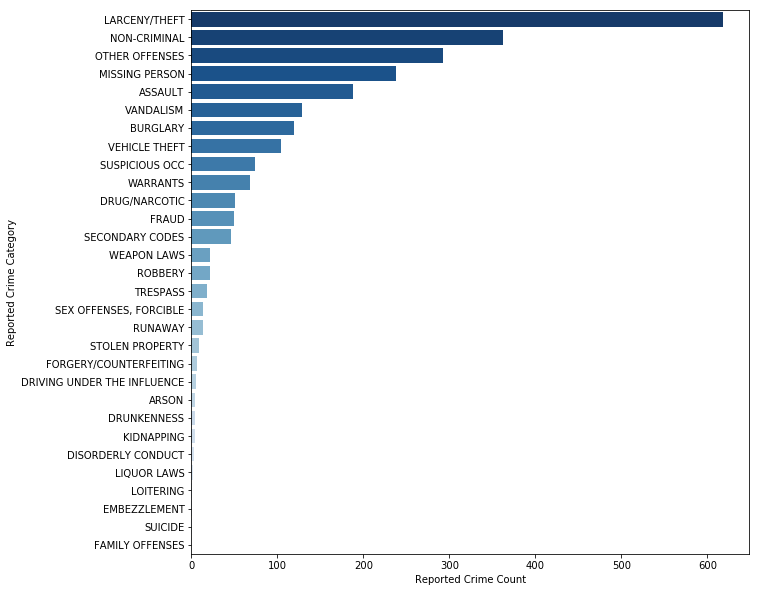

In [16]:
make_bar_plot(park_crimes_df.Category.value_counts(),
             park_crimes_df.Category.value_counts().index,
             'Blues_r',
             'Reported Crime Count',
             'Reported Crime Category')

The most frequent complaints remain more of less similar to the overall complaints.

Out of curiosity I located our 'potential' grocery store on a map of the disctricts in SF, provided by SF Police Department, the image is shown below.

<img src='SF_District.png' width = '500px',height='500px' alt='SF_Ditrict'>
<div align ='center'> Store Location</div>

As seen from the image, our store is on the edge of PARK and NORTHERN districts.<br> A better approach would be to locate distress call locations using the geographical co-ordinates in the original data set. Lets do that next.

The latitude and longitude of our store are :<b> -122.441534, 37.776466</b>
We'll choose locations that are within 0.001 or our store location, which is roughly a two block distance

In [17]:
store_vicinity = crime_df.loc[(crime_df.X>-122.442) & (crime_df.X<-122.440 )
                               &(crime_df.Y<37.777) & (crime_df.Y>37.775), ['Category','PdDistrict','Address','Descript']]

In [18]:
store_vicinity.head()

,Category,PdDistrict,Address,Descript
2407,ASSAULT,PARK,1400 Block of GROVE ST,BATTERY
13008,WARRANTS,PARK,GROVE ST / BAKER ST,ENROUTE TO OUTSIDE JURISDICTION
13508,LARCENY/THEFT,PARK,400 Block of BAKER ST,PETTY THEFT OF PROPERTY
15323,MISSING PERSON,PARK,400 Block of BAKER ST,FOUND PERSON
15324,MISSING PERSON,PARK,400 Block of BAKER ST,MISSING ADULT


In [19]:
store_vicinity.PdDistrict.value_counts()

PARK    32
Name: PdDistrict, dtype: int64

The above code shows that all of the distress calls in the vicinity were from the PARK district.

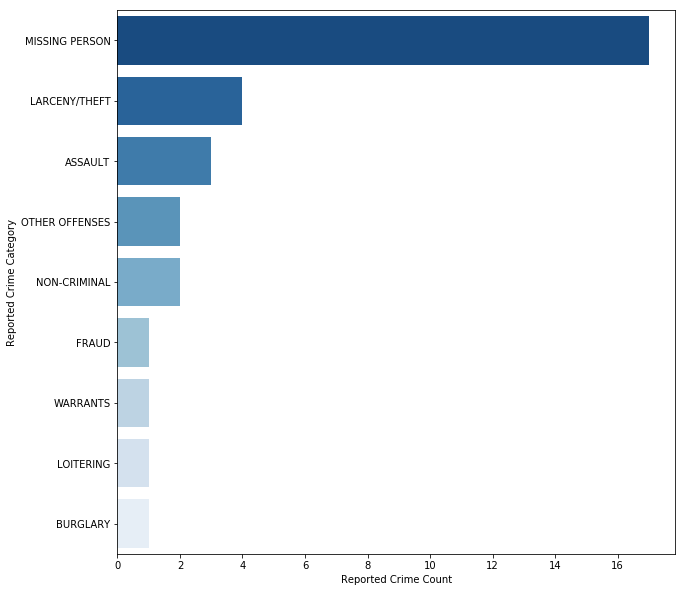

In [20]:
make_bar_plot(store_vicinity.Category.value_counts(),
              store_vicinity.Category.value_counts().index,
              'Blues_r',
              'Reported Crime Count',
              'Reported Crime Category')

>The total distress call count was 32 in the immediate vicinity of our store location,which looks to be a good sign!<br> (Taking into account the total 46,668 total distress calls placed in 2018.)

Comparing with a value in the Southern District where reported crimes were the highest
37.776393, -122.408464 Langdon and Folsom street

In [21]:
south_vicinity = crime_df.loc[(crime_df.X>-122.409) & (crime_df.X<-122.407 )
                               &(crime_df.Y<37.777) & (crime_df.Y>37.775), ['Category','PdDistrict','Address','Descript']]

In [25]:
south_vicinity.PdDistrict.value_counts()

SOUTHERN    50
Name: PdDistrict, dtype: int64

#### Looking at Rent information in the region

Zillow provides median rents prices and median rent price per square foot by property type and bedroom count.<br>
This particular dataset is for Multifamily 5+ units, acquired from Zillow.
>https://www.zillow.com/research/data/

In [98]:
rent_df = pd.read_csv('Zip_MedianRentalPrice_Mfr5Plus.csv')

In [99]:
rent_df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,10025,New York,NY,New York,New York,1,NaN,NaN,2640.0,2350.0,...,3300.0,3375.0,3395.0,3350.0,3295.0,3295.0,3295.0,3275.0,3250.0,3200.0
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,1695.0,1692.5,1650.0,1595.0,1550.0,1550.0,1595.0,1600.0,1650.0,1695.0
2,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,3535.0,3500.0,3500.0,3588.0,3535.0,3500.0,3500.0,3500.0,3410.0,3445.0
3,75070,McKinney,TX,Dallas-Fort Worth,Collin,4,NaN,NaN,NaN,NaN,...,1265.0,1265.0,1399.5,1390.0,1277.5,1259.0,1231.5,1260.0,1245.0,1228.0
4,77494,Katy,TX,Houston,Harris,5,NaN,NaN,NaN,NaN,...,1335.0,1327.5,1390.0,1390.0,1430.0,1414.0,1407.0,1396.5,1390.0,1440.0


### Extracting Data for the city of San Francisco

In [122]:
rent_sf = rent_df.loc[rent_df.City == 'San Francisco']

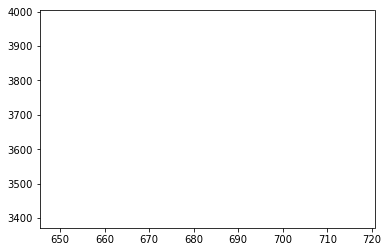

In [123]:
plt.plot(rent_sf.loc[rent_sf.RegionName==94117,'2017-01':'2018-04'])

In [124]:
rent_sf

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
12,94109,San Francisco,CA,San Francisco,San Francisco,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3555.0,3525.0,3650.0,3595.0,3555.0,3705.0,3695.0,3699.5,3600.0,3550.0,3495.0,3500.0,3575.0,3600.0,3500.0,3500.0,3500.0,3500.0,3454.0,3100.0,3150.0,3000.0,3200.0,3225.0,3350.0,3300.0,3197.0,3195.0,3199.0,3200.0,3195.0,3200.0,3250.0,3200.0,3050.0,3050.0,3100.0,3350.0,3450.0,3500.0
82,94110,San Francisco,CA,San Francisco,San Francisco,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,2922.5,2772.5,2725.0,2372.5,2595.0,...,4100.0,3950.0,3850.0,3950.0,3995.0,4250.0,4200.0,4562.5,4200.0,3950.0,3997.5,3900.0,3950.0,3997.5,4200.0,4000.0,4100.0,3850.0,3950.0,3650.0,3822.5,3672.5,3550.0,3850.0,3700.0,3800.0,3647.5,3500.0,3750.0,3787.5,3825.0,3825.0,3895.0,3862.5,3900.0,3800.0,3962.5,3925.0,3995.0,3900.0
291,94122,San Francisco,CA,San Francisco,San Francisco,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2585.0,2400.0,2450.0,2500.0,2347.5,1995.0,...,3000.0,3267.5,3200.0,3250.0,3200.0,3272.5,3350.0,3250.0,3350.0,3362.5,3207.5,3285.0,3395.0,3210.0,3195.0,3200.0,2987.5,2997.5,3300.0,3245.0,3100.0,2818.0,2750.0,2980.0,3055.0,3020.0,3130.0,3130.0,3110.0,3197.5,3320.0,3300.0,3300.0,3120.0,3000.0,3100.0,3051.0,3200.0,3100.0,2995.0
579,94115,San Francisco,CA,San Francisco,San Francisco,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3795.0,3922.5,3622.5,3872.5,3895.0,3648.0,3945.0,4150.0,3650.0,3800.0,4100.0,4275.0,3800.0,3800.0,3895.0,3870.0,3870.0,3850.0,3825.0,4000.0,3800.0,3950.0,3500.0,3397.5,3672.5,3500.0,3650.0,3599.0,3393.0,3447.0,3574.0,3708.0,3600.0,3500.0,3352.0,3695.0,3600.0,3550.0,3355.0,3500.0
683,94117,San Francisco,CA,San Francisco,San Francisco,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400.0,3412.5,3695.0,3750.0,3795.0,3700.0,3975.0,3595.0,3772.5,3597.5,3725.0,3797.5,3697.5,3600.0,3599.0,3800.0
727,94121,San Francisco,CA,San Francisco,San Francisco,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3500.0,3225.0,3375.0,3500.0,3500.0,3250.0,3300.0,3500.0,3500.0,3750.0,3450.0,3795.0,3300.0,2995.0,3175.0,3050.0,3000.0,2750.0,3200.0,3200.0,3245.0,3295.0,3425.0,3397.5,3385.0,3497.5,3600.0,3425.0,3350.0,3195.0,3200.0,3425.0,3425.0,3150.0,3350.0
742,94102,San Francisco,CA,San Francisco,San Francisco,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4368.5,4257.0,4247.0,4187.0,4257.0,4177.0,4187.0,3789.0,3868.0,3395.0,3300.0,3300.0,3322.5,3475.0,3120.0,3545.0,3497.5,3595.0,3595.0,3535.0,3538.0,3757.5,3395.0,3395.0,3397.5,3495.0,3650.0
821,94118,San Francisco,CA,San Francisco,San Francisco,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [125]:
ts_data = rent_sf.loc[rent_sf.RegionName == 94117,'2010-02':]

In [126]:
ts_data

,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400.0,3412.5,3695.0,3750.0,3795.0,3700.0,3975.0,3595.0,3772.5,3597.5,3725.0,3797.5,3697.5,3600.0,3599.0,3800.0


In [129]:
ts_data.dropna(axis='columns',inplace=True)

In [135]:
ts_data

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
683,3400.0,3412.5,3695.0,3750.0,3795.0,3700.0,3975.0,3595.0,3772.5,3597.5,3725.0,3797.5,3697.5,3600.0,3599.0,3800.0


In [154]:
ts_all_data = rent_sf.loc[:,'2010-02':]
ts_all_data.index = rent_sf.RegionName
ts_all_data

,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
94109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3555.0,3525.0,3650.0,3595.0,3555.0,3705.0,3695.0,3699.5,3600.0,3550.0,3495.0,3500.0,3575.0,3600.0,3500.0,3500.0,3500.0,3500.0,3454.0,3100.0,3150.0,3000.0,3200.0,3225.0,3350.0,3300.0,3197.0,3195.0,3199.0,3200.0,3195.0,3200.0,3250.0,3200.0,3050.0,3050.0,3100.0,3350.0,3450.0,3500.0
94110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,2922.5,2772.5,2725.0,2372.5,2595.0,2522.5,2695.0,3075.0,2900.0,2775.0,3000.0,...,4100.0,3950.0,3850.0,3950.0,3995.0,4250.0,4200.0,4562.5,4200.0,3950.0,3997.5,3900.0,3950.0,3997.5,4200.0,4000.0,4100.0,3850.0,3950.0,3650.0,3822.5,3672.5,3550.0,3850.0,3700.0,3800.0,3647.5,3500.0,3750.0,3787.5,3825.0,3825.0,3895.0,3862.5,3900.0,3800.0,3962.5,3925.0,3995.0,3900.0
94122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2585.0,2400.0,2450.0,2500.0,2347.5,1995.0,2150.0,2372.5,2635.0,2643.5,2582.5,2550.0,...,3000.0,3267.5,3200.0,3250.0,3200.0,3272.5,3350.0,3250.0,3350.0,3362.5,3207.5,3285.0,3395.0,3210.0,3195.0,3200.0,2987.5,2997.5,3300.0,3245.0,3100.0,2818.0,2750.0,2980.0,3055.0,3020.0,3130.0,3130.0,3110.0,3197.5,3320.0,3300.0,3300.0,3120.0,3000.0,3100.0,3051.0,3200.0,3100.0,2995.0
94115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3795.0,3922.5,3622.5,3872.5,3895.0,3648.0,3945.0,4150.0,3650.0,3800.0,4100.0,4275.0,3800.0,3800.0,3895.0,3870.0,3870.0,3850.0,3825.0,4000.0,3800.0,3950.0,3500.0,3397.5,3672.5,3500.0,3650.0,3599.0,3393.0,3447.0,3574.0,3708.0,3600.0,3500.0,3352.0,3695.0,3600.0,3550.0,3355.0,3500.0
94117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400.0,3412.5,3695.0,3750.0,3795.0,3700.0,3975.0,3595.0,3772.5,3597.5,3725.0,3797.5,3697.5,3600.0,3599.0,3800.0
94121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3500.0,3225.0,3375.0,3500.0,3500.0,3250.0,3300.0,3500.0,3500.0,3750.0,3450.0,3795.0,3300.0,2995.0,3175.0,3050.0,3000.0,2750.0,3200.0,3200.0,3245.0,3295.0,3425.0,3397.5,3385.0,3497.5,3600.0,3425.0,3350.0,3195.0,3200.0,3425.0,3425.0,3150.0,3350.0
94102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4368.5,4257.0,4247.0,4187.0,4257.0,4177.0,4187.0,3789.0,3868.0,3395.0,3300.0,3300.0,3322.5,3475.0,3120.0,3545.0,3497.5,3595.0,3595.0,3535.0,3538.0,3757.5,3395.0,3395.0,3397.5,3495.0,3650.0
94118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.

AttributeError: Unknown property figsize

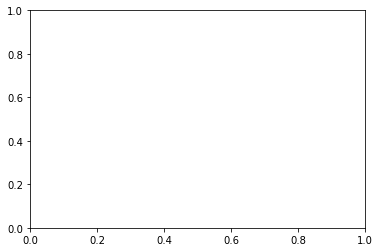

In [162]:
for index, row in ts_all_data.iterrows():
    ts_data = rent_sf.loc[rent_sf.RegionName == index,'2010-02':]
    ts_data.dropna(axis='columns',inplace=True)
    shop_rent = ts_data.values[0]
    xs = [i for i, _ in enumerate(shop_rent)]
#     plt.subplots(figsize=(10,10))
    plt.plot(xs, shop_rent, label = index)
    plt.legend(loc=9)

In [133]:
shop_rent = ts_data.values[0]
shop_rent

array([3400. , 3412.5, 3695. , 3750. , 3795. , 3700. , 3975. , 3595. ,
       3772.5, 3597.5, 3725. , 3797.5, 3697.5, 3600. , 3599. , 3800. ])

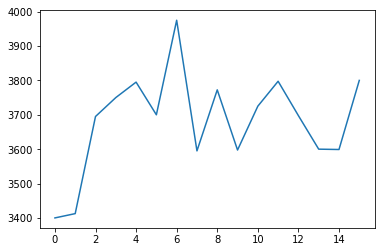

In [134]:
plt.plot(shop_rent)